Association Rules using R

In this project we will develop association rules using R programming language

Firstly we will install required packages and import rewuired libraries

In [1]:
install.packages("arules")
install.packages("arulesViz")
install.packages("psych")
install.packages("xlsx")
install.packages("openxlsx")
install.packages("dplyr")
install.packages("lubridate")

library(arules)
library(arulesViz)
library(psych)
library(dplyr)
library(openxlsx)
library(lubridate)



  There is a binary version available but the source version is later:
       binary source needs_compilation
arules  1.6-7  1.6-8              TRUE

  Binaries will be installed
package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DevPro\AppData\Local\Temp\RtmpQvWsDh\downloaded_packages

  There is a binary version available but the source version is later:
          binary source needs_compilation
arulesViz  1.4-0  1.5-0             FALSE



installing the source package 'arulesViz'



package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DevPro\AppData\Local\Temp\RtmpQvWsDh\downloaded_packages
package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DevPro\AppData\Local\Temp\RtmpQvWsDh\downloaded_packages
package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DevPro\AppData\Local\Temp\RtmpQvWsDh\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DevPro\AppData\Local\Temp\RtmpQvWsDh\downloaded_packages
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DevPro\AppData\Local\Temp\RtmpQvWsDh\downloaded_packages


Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'psych' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:arules':

    intersect, recode, setdiff, setequal, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'openxlsx' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:arules':

    intersect, setdiff, union

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



arules for performing association rules
arulesVİz package to visualise the rules 
xlsx for importing the xlsx file
lubridate for Date operations
dplyr for filtering and querying

Let's read the dataset saved in xlsx format in the workspace

In [2]:
dataset <- read.xlsx("online_retail_II.xlsx","Year 2009-2010")
head(dataset)
str(dataset)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,40148.32,6.95,13085,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,40148.32,6.75,13085,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,40148.32,6.75,13085,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,40148.32,2.10,13085,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,40148.32,1.25,13085,United Kingdom
489434,22064,PINK DOUGHNUT TRINKET POT,24,40148.32,1.65,13085,United Kingdom


'data.frame':	525461 obs. of  8 variables:
 $ Invoice    : chr  "489434" "489434" "489434" "489434" ...
 $ StockCode  : chr  "85048" "79323P" "79323W" "22041" ...
 $ Description: chr  "15CM CHRISTMAS GLASS BALL 20 LIGHTS" "PINK CHERRY LIGHTS" " WHITE CHERRY LIGHTS" "RECORD FRAME 7\" SINGLE SIZE " ...
 $ Quantity   : num  12 12 12 48 24 24 24 10 12 12 ...
 $ InvoiceDate: num  40148 40148 40148 40148 40148 ...
 $ Price      : num  6.95 6.75 6.75 2.1 1.25 1.65 1.25 5.95 2.55 3.75 ...
 $ Customer.ID: num  13085 13085 13085 13085 13085 ...
 $ Country    : chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


As you see the InvoiceDate column is not in Date format, lets create a new column named InvoiceDate.new and convert InvoiceDate to DateTime

In [3]:
dataset$InvoiceDate.new <- format(as.POSIXct((dataset$InvoiceDate) * 86400, origin = "1999-12-30", tz = "GMT"), "%d-%m-%y %H:%M")
dataset$InvoiceDate.new <- dmy_hm(dataset$InvoiceDate.new)
head(dataset)
str(dataset)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country,InvoiceDate.new
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,40148.32,6.95,13085,United Kingdom,2009-12-01 07:45:00
489434,79323P,PINK CHERRY LIGHTS,12,40148.32,6.75,13085,United Kingdom,2009-12-01 07:45:00
489434,79323W,WHITE CHERRY LIGHTS,12,40148.32,6.75,13085,United Kingdom,2009-12-01 07:45:00
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,40148.32,2.10,13085,United Kingdom,2009-12-01 07:45:00
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,40148.32,1.25,13085,United Kingdom,2009-12-01 07:45:00
489434,22064,PINK DOUGHNUT TRINKET POT,24,40148.32,1.65,13085,United Kingdom,2009-12-01 07:45:00


'data.frame':	525461 obs. of  9 variables:
 $ Invoice        : chr  "489434" "489434" "489434" "489434" ...
 $ StockCode      : chr  "85048" "79323P" "79323W" "22041" ...
 $ Description    : chr  "15CM CHRISTMAS GLASS BALL 20 LIGHTS" "PINK CHERRY LIGHTS" " WHITE CHERRY LIGHTS" "RECORD FRAME 7\" SINGLE SIZE " ...
 $ Quantity       : num  12 12 12 48 24 24 24 10 12 12 ...
 $ InvoiceDate    : num  40148 40148 40148 40148 40148 ...
 $ Price          : num  6.95 6.75 6.75 2.1 1.25 1.65 1.25 5.95 2.55 3.75 ...
 $ Customer.ID    : num  13085 13085 13085 13085 13085 ...
 $ Country        : chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...
 $ InvoiceDate.new: POSIXct, format: "2009-12-01 07:45:00" "2009-12-01 07:45:00" ...


Let's have a look at the statistics of the dataset

In [4]:
summary(dataset)

   Invoice           StockCode         Description           Quantity       
 Length:525461      Length:525461      Length:525461      Min.   :-9600.00  
 Class :character   Class :character   Class :character   1st Qu.:    1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    3.00  
                                                          Mean   :   10.34  
                                                          3rd Qu.:   10.00  
                                                          Max.   :19152.00  
                                                                            
  InvoiceDate        Price            Customer.ID       Country         
 Min.   :40148   Min.   :-53594.36   Min.   :12346    Length:525461     
 1st Qu.:40259   1st Qu.:     1.25   1st Qu.:13983    Class :character  
 Median :40365   Median :     2.10   Median :15311    Mode  :character  
 Mean   :40357   Mean   :     4.69   Mean   :15361                      
 3rd Qu.:40467   3r

We can get more statistics using describe() function int psych library. Here the vars with an asterisks(*) are factors.

In [5]:
describe(dataset)

Warning message in FUN(newX[, i], ...):
"min için eksik olmayan argüman yok; Inf döndürülüyor"Warning message in FUN(newX[, i], ...):
"max için eksik olmayan argüman yok; -Inf döndürülüyor"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Invoice*,1,525461,12756.272022,7392.888319,12973.00,12813.514603,9528.67020,1.00,28816.00,28815.0000,-0.05151479,-1.1901990,10.198678504
StockCode*,2,525461,1855.279549,1108.771525,1666.00,1776.043036,1005.20280,1.00,4632.00,4631.0000,0.61998284,-0.4701086,1.529578674
Description*,3,522533,2474.231208,1324.417463,2450.00,2500.876821,1645.68600,1.00,4681.00,4680.0000,-0.12456777,-1.1112463,1.832179574
Quantity,4,525461,10.337667,107.424110,3.00,5.129291,2.96520,-9600.00,19152.00,28752.0000,36.04441107,6277.5832566,0.148194307
InvoiceDate,5,525461,40357.484454,116.077606,40365.41,40362.631939,154.17187,40148.32,40521.83,373.5111,-0.24898391,-1.2507674,0.160132026
Price,6,525461,4.688834,146.126914,2.10,2.714061,1.85325,-53594.36,25111.09,78705.4500,-140.76764184,64867.4807016,0.201585815
Customer.ID,7,417534,15360.645478,1680.811316,15311.00,15367.900865,2137.90920,12346.00,18287.00,5941.0000,-0.01652417,-1.1886342,2.601195776
Country*,8,525461,35.427992,5.988976,37.00,37.000000,0.00000,1.00,40.00,39.0000,-3.77912134,12.9470637,0.008261945
InvoiceDate.new,9,525461,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA


As we will develop association rules we will use 
1- use positive quantities 
2- use real sales invoice numbers between 489434 and 538171
3- use prices that are higher than zero 
4- remove stockcodes notr realated to product bought together. (like adjustments, bank charges, manuals, posting costs, tests, etc..)
by setting NA to the unrelated cells using mutate() function from dplyr library. Then we will remove these unrelated rows with na.omit()

In [6]:
dataset <- dataset %>% 
  mutate(Quantity = replace(Quantity, Quantity<=0, NA),
         Price = replace(Price, Price<=0, NA),
         Invoice = replace(Invoice, Invoice < "489434" | Invoice > "538171", NA),
         StockCode = replace(StockCode, 
                             StockCode == "ADJUST" |
                             StockCode == "ADJUST2"|
                             StockCode == "BANK CHARGES"|
                             StockCode == "C2"|
                             StockCode == "D"|
                             StockCode == "M"|
                             StockCode == "POST"|
                             StockCode == "TEST001" |
                             StockCode == "TEST002",NA))

dataset <- na.omit(dataset)
head(dataset)

summary(dataset)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country,InvoiceDate.new
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,40148.32,6.95,13085,United Kingdom,2009-12-01 07:45:00
489434,79323P,PINK CHERRY LIGHTS,12,40148.32,6.75,13085,United Kingdom,2009-12-01 07:45:00
489434,79323W,WHITE CHERRY LIGHTS,12,40148.32,6.75,13085,United Kingdom,2009-12-01 07:45:00
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,40148.32,2.10,13085,United Kingdom,2009-12-01 07:45:00
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,40148.32,1.25,13085,United Kingdom,2009-12-01 07:45:00
489434,22064,PINK DOUGHNUT TRINKET POT,24,40148.32,1.65,13085,United Kingdom,2009-12-01 07:45:00


   Invoice           StockCode         Description           Quantity       
 Length:406311      Length:406311      Length:406311      Min.   :    1.00  
 Class :character   Class :character   Class :character   1st Qu.:    2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    5.00  
                                                          Mean   :   13.62  
                                                          3rd Qu.:   12.00  
                                                          Max.   :19152.00  
  InvoiceDate        Price          Customer.ID      Country         
 Min.   :40148   Min.   :  0.001   Min.   :12346   Length:406311     
 1st Qu.:40264   1st Qu.:  1.250   1st Qu.:14006   Class :character  
 Median :40369   Median :  1.950   Median :15326   Mode  :character  
 Mean   :40360   Mean   :  2.992   Mean   :15374                     
 3rd Qu.:40466   3rd Qu.:  3.750   3rd Qu.:16814                     
 Max.   :40522   Max.   :295.000   Max.  

As you see the number of  rows has been decreased to 406311 which were 525461

Let's findout how many  invoices we have 

In [7]:
invoice_count <- length(unique(dataset$Invoice))
invoice_count

[1] 18966

and the number of unique product count

In [8]:
unique_product_count <- length(unique(dataset$Description))
unique_product_count

[1] 4434

We will use Invoice and Description columns for Apriori analysis.
In apriori() one invoice must be presented in a row with the products in it.

In [9]:
dataset <- dataset[c(1,3)]
head(dataset)

Invoice,Description
489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS
489434,PINK CHERRY LIGHTS
489434,WHITE CHERRY LIGHTS
489434,"RECORD FRAME 7"" SINGLE SIZE"
489434,STRAWBERRY CERAMIC TRINKET BOX
489434,PINK DOUGHNUT TRINKET POT


In [10]:
dataset <- dataset %>%
  group_by(Invoice)%>% 
  arrange(Description) %>%
  summarise(purchased_products = paste(Description, collapse =","))
head(dataset)

Invoice,purchased_products
489434,"WHITE CHERRY LIGHTS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,FANCY FONT HOME SWEET HOME DOORMAT,PINK CHERRY LIGHTS,PINK DOUGHNUT TRINKET POT ,RECORD FRAME 7"" SINGLE SIZE ,SAVE THE PLANET MUG,STRAWBERRY CERAMIC TRINKET BOX"
489435,"CAT BOWL ,DOG BOWL , CHASING BALL DESIGN,HEART MEASURING SPOONS LARGE,LUNCHBOX WITH CUTLERY FAIRY CAKES"
489436,"PEACE WOODEN BLOCK LETTERS,AREA PATROLLED METAL SIGN,ASSORTED COLOUR BIRD ORNAMENT,BATH BUILDING BLOCK WORD,BISCUITS SMALL BOWL LIGHT BLUE,BLACK DINER WALL CLOCK,CHRISTMAS CRAFT WHITE FAIRY ,CLASSIC WHITE FRAME,DOOR MAT BLACK FLOCK ,FULL ENGLISH BREAKFAST PLATE,HEART FILIGREE DOVE LARGE,HEART IVORY TRELLIS LARGE,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,PIZZA PLATE IN BOX,PLEASE ONE PERSON METAL SIGN,SCOTTIE DOG HOT WATER BOTTLE,SET OF 3 BLACK FLYING DUCKS,SMALL MARSHMALLOWS PINK BOWL"
489437,"BLUE PADDED SOFT MOBILE,CHOCOLATE HOT WATER BOTTLE,CHRISTMAS CRAFT HEART DECORATIONS,CHRISTMAS CRAFT HEART STOCKING ,CINAMMON & ORANGE WREATH,EUCALYPTUS & PINECONE WREATH,FELTCRAFT DOLL EMILY,FELTCRAFT DOLL MARIA,FELTCRAFT DOLL ROSIE,FLORAL BLUE MONSTER,HANGING HEART ZINC T-LIGHT HOLDER,INFLATABLE POLITICAL GLOBE ,JOY LARGE WOOD LETTERS,PACK OF 20 SKULL PAPER NAPKINS,PACK OF 6 SKULL PAPER CUPS,PARTY CONE CHRISTMAS DECORATION ,PEACE SMALL WOOD LETTERS,PINK BLUE FELT CRAFT TRINKET BOX,RETRO COFFEE MUGS ASSORTED,SCOTTIE DOG HOT WATER BOTTLE,STRIPES DESIGN MONKEY DOLL,VINTAGE SNAKES & LADDERS,WOODEN BOX ADVENT CALENDAR"
489438,"CARROT CHARLIE+LOLA COASTER SET,CHARLIE & LOLA WASTEPAPER BIN BLUE,CHARLIE & LOLA WASTEPAPER BIN FLORA,CHARLIE + LOLA BISCUITS TINS,CHARLIE + LOLA RED HOT WATER BOTTLE,CHARLIE AND LOLA CHARLOTTE BAG,CHARLIE AND LOLA FIGURES TINS,CHARLIE LOLA BLUE HOT WATER BOTTLE ,CHARLIE+LOLA PINK HOT WATER BOTTLE,CHARLIE+LOLA RED HOT WATER BOTTLE ,COUNTRY COTTAGE DOORSTOP GREEN,DINOSAURS WRITING SET ,GINGHAM HEART DOORSTOP RED,JUMBO BAG CHARLIE AND LOLA TOYS,JUMBO BAG TOYS ,SET OF MEADOW FLOWER STICKERS,TOMATO CHARLIE+LOLA COASTER SET"
489439,"VINTAGE DESIGN GIFT TAGS,ASSORTED CAKES FRIDGE MAGNETS,ASSORTED COLOUR MINI CASES,BAKING SET 9 PIECE RETROSPOT ,BLACK/BLUE DOTS RUFFLED UMBRELLA,CHRISTMAS PUDDING TRINKET POT ,LUNCHBOX WITH CUTLERY RETROSPOT ,PACK 20 DOLLY PEGS,PARTY CONE CHRISTMAS DECORATION ,PINK DOUGHNUT TRINKET POT ,RED TOADSTOOL LED NIGHT LIGHT,RED/WHITE DOTS RUFFLED UMBRELLA,RETRO SPORT PARTY BAG + STICKER SET,RETRO SPOT TEA SET CERAMIC 11 PC ,SET OF THREE VINTAGE GIFT WRAPS,SET/3 RUSSIAN DOLL STACKING TINS,WRAP BLUE RUSSIAN FOLKART,WRAP ENGLISH ROSE"


In apriori() we will use only the purchased_products column. 


In [11]:
dataset <- dataset[2]

In [12]:
head(dataset)

purchased_products
"WHITE CHERRY LIGHTS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,FANCY FONT HOME SWEET HOME DOORMAT,PINK CHERRY LIGHTS,PINK DOUGHNUT TRINKET POT ,RECORD FRAME 7"" SINGLE SIZE ,SAVE THE PLANET MUG,STRAWBERRY CERAMIC TRINKET BOX"
"CAT BOWL ,DOG BOWL , CHASING BALL DESIGN,HEART MEASURING SPOONS LARGE,LUNCHBOX WITH CUTLERY FAIRY CAKES"
"PEACE WOODEN BLOCK LETTERS,AREA PATROLLED METAL SIGN,ASSORTED COLOUR BIRD ORNAMENT,BATH BUILDING BLOCK WORD,BISCUITS SMALL BOWL LIGHT BLUE,BLACK DINER WALL CLOCK,CHRISTMAS CRAFT WHITE FAIRY ,CLASSIC WHITE FRAME,DOOR MAT BLACK FLOCK ,FULL ENGLISH BREAKFAST PLATE,HEART FILIGREE DOVE LARGE,HEART IVORY TRELLIS LARGE,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,PIZZA PLATE IN BOX,PLEASE ONE PERSON METAL SIGN,SCOTTIE DOG HOT WATER BOTTLE,SET OF 3 BLACK FLYING DUCKS,SMALL MARSHMALLOWS PINK BOWL"
"BLUE PADDED SOFT MOBILE,CHOCOLATE HOT WATER BOTTLE,CHRISTMAS CRAFT HEART DECORATIONS,CHRISTMAS CRAFT HEART STOCKING ,CINAMMON & ORANGE WREATH,EUCALYPTUS & PINECONE WREATH,FELTCRAFT DOLL EMILY,FELTCRAFT DOLL MARIA,FELTCRAFT DOLL ROSIE,FLORAL BLUE MONSTER,HANGING HEART ZINC T-LIGHT HOLDER,INFLATABLE POLITICAL GLOBE ,JOY LARGE WOOD LETTERS,PACK OF 20 SKULL PAPER NAPKINS,PACK OF 6 SKULL PAPER CUPS,PARTY CONE CHRISTMAS DECORATION ,PEACE SMALL WOOD LETTERS,PINK BLUE FELT CRAFT TRINKET BOX,RETRO COFFEE MUGS ASSORTED,SCOTTIE DOG HOT WATER BOTTLE,STRIPES DESIGN MONKEY DOLL,VINTAGE SNAKES & LADDERS,WOODEN BOX ADVENT CALENDAR"
"CARROT CHARLIE+LOLA COASTER SET,CHARLIE & LOLA WASTEPAPER BIN BLUE,CHARLIE & LOLA WASTEPAPER BIN FLORA,CHARLIE + LOLA BISCUITS TINS,CHARLIE + LOLA RED HOT WATER BOTTLE,CHARLIE AND LOLA CHARLOTTE BAG,CHARLIE AND LOLA FIGURES TINS,CHARLIE LOLA BLUE HOT WATER BOTTLE ,CHARLIE+LOLA PINK HOT WATER BOTTLE,CHARLIE+LOLA RED HOT WATER BOTTLE ,COUNTRY COTTAGE DOORSTOP GREEN,DINOSAURS WRITING SET ,GINGHAM HEART DOORSTOP RED,JUMBO BAG CHARLIE AND LOLA TOYS,JUMBO BAG TOYS ,SET OF MEADOW FLOWER STICKERS,TOMATO CHARLIE+LOLA COASTER SET"
"VINTAGE DESIGN GIFT TAGS,ASSORTED CAKES FRIDGE MAGNETS,ASSORTED COLOUR MINI CASES,BAKING SET 9 PIECE RETROSPOT ,BLACK/BLUE DOTS RUFFLED UMBRELLA,CHRISTMAS PUDDING TRINKET POT ,LUNCHBOX WITH CUTLERY RETROSPOT ,PACK 20 DOLLY PEGS,PARTY CONE CHRISTMAS DECORATION ,PINK DOUGHNUT TRINKET POT ,RED TOADSTOOL LED NIGHT LIGHT,RED/WHITE DOTS RUFFLED UMBRELLA,RETRO SPORT PARTY BAG + STICKER SET,RETRO SPOT TEA SET CERAMIC 11 PC ,SET OF THREE VINTAGE GIFT WRAPS,SET/3 RUSSIAN DOLL STACKING TINS,WRAP BLUE RUSSIAN FOLKART,WRAP ENGLISH ROSE"


lets save the dataset to the workspace as "retail_apriori.csv" file using write.table() function

In [16]:
write.table(dataset,"retail_apriori.csv", sep =",", col.names = FALSE, row.names =FALSE)

Now, we have a table to be used in apriori() function tho find out the association rules. LEt's begin with reading transaction in apriori()

In [19]:
products <- read.transactions("retail_apriori.csv", sep =",")

Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text

transactions as itemMatrix in sparse format with
 18966 rows (elements/itemsets/transactions) and
 18424 columns (items) and a density of 5.891602e-05 

most frequent items:
WHITE HANGING HEART T-LIGHT HOLDER           REGENCY CAKESTAND 3 TIER 
                                57                                 41 
              SMALL POPCORN HOLDER     STRAWBERRY CERAMIC TRINKET BOX 
                                29                                 25 
      REX CASH+CARRY JUMBO SHOPPER                            (Other) 
                                22                              20413 

element (itemset/transaction) length distribution:
sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
18803    27    14    17    11     7    12     4     6     7     7     2     5 
   14    15    16    17    19    20    21    22    23    24    25    26    27 
    3     2     4     3     2     3     6     1     6     1     1     2     1 
   29    30    33    39   

In [20]:
summary(products)

transactions as itemMatrix in sparse format with
 18966 rows (elements/itemsets/transactions) and
 18424 columns (items) and a density of 5.891602e-05 

most frequent items:
WHITE HANGING HEART T-LIGHT HOLDER           REGENCY CAKESTAND 3 TIER 
                                57                                 41 
              SMALL POPCORN HOLDER     STRAWBERRY CERAMIC TRINKET BOX 
                                29                                 25 
      REX CASH+CARRY JUMBO SHOPPER                            (Other) 
                                22                              20413 

element (itemset/transaction) length distribution:
sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
18803    27    14    17    11     7    12     4     6     7     7     2     5 
   14    15    16    17    19    20    21    22    23    24    25    26    27 
    3     2     4     3     2     3     6     1     6     1     1     2     1 
   29    30    33    39   

We have found out the most frequent items and number of k-item frequent itemsets!

To show some transaction inspect() function is used. to get the first 3 transactions :

In [21]:
inspect(products[1:3])

    items                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
[1] {SAVE THE PLANET MUG,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Now let's get the support levels og the first 3 items

In [22]:
itemFrequency(products[,1:3])

1 HANGER 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1.054519e-04 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        10 COLOUR SPACEBOY PEN 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

itemFrequencyPlot() function allows us to produce a bar chart depicting the proportion of transactions.

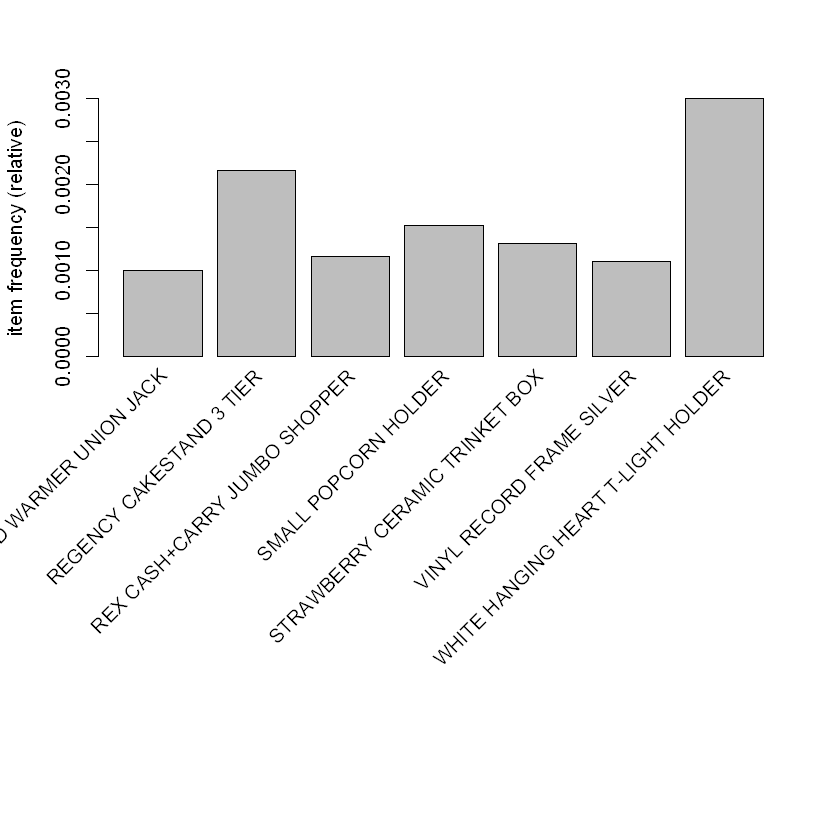

In [23]:
itemFrequencyPlot(products, support = 0.001)

Most purchased 10 items are :

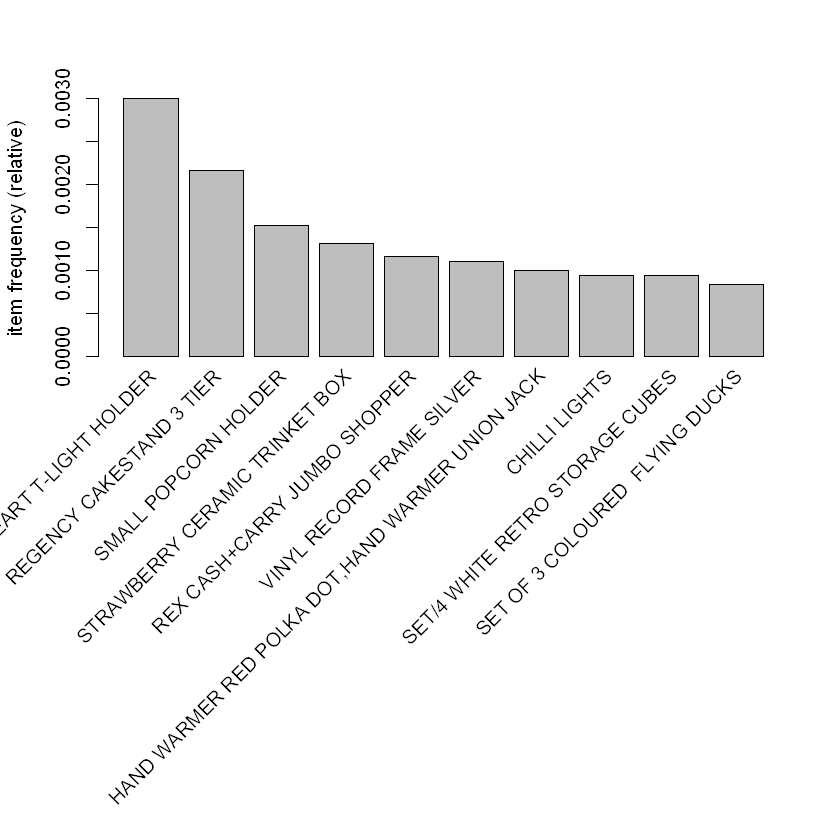

In [24]:
itemFrequencyPlot(products, topN = 10)

Now we will create rules for trasactions with default support and confidence  levels

In [25]:
rules <- apriori(products)
summary(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1896 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[18424 item(s), 18966 transaction(s)] done [0.04s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules


support : 0.1 and confidence: 0.8 levels did not return any itemsets. We must reduce these levels

using support = 0.0002 and confidence = 0.75 levels we get 90 rules as follows

In [27]:
productsRules  <- apriori(products, parameter = list( support = 0.0002, confidence = 0.75, target = "rules"))
summary(productsRules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5   2e-04      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[18424 item(s), 18966 transaction(s)] done [0.03s].
sorting and recoding items ... [255 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [90 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 90 rules

rule length distribution (lhs + rhs):sizes
 2  3  4  5 
21 44 20  5 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     3.0     3.0     3.1     4.0     5.0 

summary of quality measures:
    support            confidence        coverage              lift       
 Min.   :0.0002109   Min.   :0.7500   Min.   :0.0002109   Min.   : 266.2  
 1st Qu.:0.0002109   1st Qu.:0.8083   1st Qu.:0.0002109   1st Qu.:1104.6  
 Median :0.0002109   Median :1.0000   Median :0.0002109   Median :1519.7  
 Mean   :0.0002244   Mean   :0.9319   Mean   :0.0002437   Mean   :1919.9  
 3rd Qu.:0.0002109   3rd Qu.:1.0000   3rd Qu.:0.0002636   3rd Qu.:3161.0  
 Max.   :0.0003164   Max.   :1.0000   Max.   :0.0004218   Max.   :3793.2  
     count      
 Min.   :4.000  
 1st Qu.:4.000  
 Median :4.000  
 Mean   :4.256  
 3rd Qu.:4.000  
 Max.   :6.000  

mining info:
     data ntransactions support confidence
 products         18966   2e-04       0.75

Let's have a look at first 20 association rules

In [28]:
inspect(productsRules[1:20])

     lhs                                      rhs                                       support confidence     coverage      lift count
[1]  {RETROSPOT CHILDRENS APRON}           => {WHITE HANGING HEART T-LIGHT HOLDER} 0.0002109037  0.8000000 0.0002636297  266.1895     4
[2]  {TOAST ITS - BEST MUM}                => {SET OF 3 COLOURED  FLYING DUCKS}    0.0002636297  0.8333333 0.0003163556  987.8125     5
[3]  {TOAST ITS - BEST MUM}                => {WHITE HANGING HEART T-LIGHT HOLDER} 0.0002636297  0.8333333 0.0003163556  277.2807     5
[4]  {SNOWSTORM PHOTO FRAME FRIDGE MAGNET} => {TEA PARTY BIRTHDAY CARD}            0.0002109037  1.0000000 0.0002109037 3161.0000     4
[5]  {SNOWSTORM PHOTO FRAME FRIDGE MAGNET} => {RED TOADSTOOL LED NIGHT LIGHT}      0.0002109037  1.0000000 0.0002109037 1264.4000     4
[6]  {SWEETHEART CERAMIC TRINKET BOX}      => {STRAWBERRY CERAMIC TRINKET BOX}     0.0003163556  0.7500000 0.0004218074  568.9800     6
[7]  {RETRO PINK BALL ASHTRAY}             => {R

Most commonly used criteria in associacion rules is the lift level. So let's find out the top 10 rule by lift

In [29]:
inspect(sort(productsRules, by = "lift")[1:10])

     lhs                                      rhs                                        support confidence     coverage   lift count
[1]  {HANGING CHICK CREAM}                 => {HANGING CHICK  GREEN}                0.0002109037  0.8000000 0.0002636297 3793.2     4
[2]  {RED TOADSTOOL LED NIGHT LIGHT,                                                                                                 
      TEA PARTY BIRTHDAY CARD}             => {SNOWSTORM PHOTO FRAME FRIDGE MAGNET} 0.0002109037  0.8000000 0.0002636297 3793.2     4
[3]  {HANGING CHICK CREAM,                                                                                                           
      SPRING DEC}                          => {HANGING CHICK  GREEN}                0.0002109037  0.8000000 0.0002636297 3793.2     4
[4]  {HANGING CHICK  GREEN}                => {HANGING CHICK CREAM}                 0.0002109037  1.0000000 0.0002109037 3793.2     4
[5]  {HANGING CHICK  GREEN,                                   

Sometimes we need the rules of a certain product to manage marketing promotions. We can do this using subset() function under arules library. E.g. "HANGING CHICK CREAM" item rules as follows: 

In [30]:
hangingChickCreamRules <- subset(productsRules, items %in% "HANGING CHICK CREAM")
inspect(hangingChickCreamRules)

    lhs                       rhs                         support confidence     coverage   lift count
[1] {HANGING CHICK  GREEN} => {HANGING CHICK CREAM}  0.0002109037  1.0000000 0.0002109037 3793.2     4
[2] {HANGING CHICK CREAM}  => {HANGING CHICK  GREEN} 0.0002109037  0.8000000 0.0002636297 3793.2     4
[3] {HANGING CHICK CREAM}  => {SPRING DEC}           0.0002636297  1.0000000 0.0002636297 3161.0     5
[4] {SPRING DEC}           => {HANGING CHICK CREAM}  0.0002636297  0.8333333 0.0003163556 3161.0     5
[5] {HANGING CHICK  GREEN,                                                                            
     HANGING CHICK CREAM}  => {SPRING DEC}           0.0002109037  1.0000000 0.0002109037 3161.0     4
[6] {HANGING CHICK  GREEN,                                                                            
     SPRING DEC}           => {HANGING CHICK CREAM}  0.0002109037  1.0000000 0.0002109037 3793.2     4
[7] {HANGING CHICK CREAM,                                                

Finally let's see all associations in a graph. plot() function can visualise up to 100 association rules : 

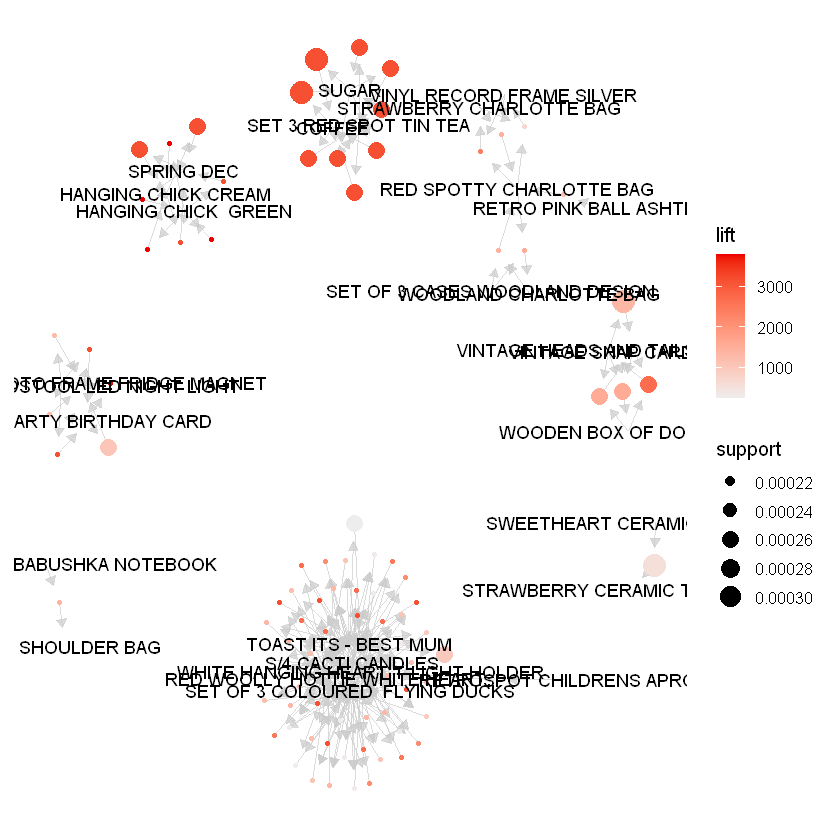

In [31]:
plot(productsRules, method="graph")

Happy coding!